___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Авторские права принадлежат Pierian Data Inc.</em></center>
<center><em>Для дополнительной информации посетите наш сайт <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Мультиклассовая Логистическая Регрессия

Студенты часто спрашивают, как выполняется не-бинарная классификация с помощью логистической регрессии. К счастью, сделать это в scikit-learn можно практически точно так же, как и в случае бинарной классификации. Давайте рассмотрим этот процесс на простом наборе данных, с также посмотрим, как использовать LogisticRegression с применением GridSearchCV (вместо LogisticRegressionCV). Дополнительные детали есть в видео-лекции - там мы обсуждаем, что именно происходит "под капотом".

## Imports

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Данные

Мы будем работать с классическим набором данных Iris Data Set. Это цветки Ириса, и набор данных о них был создан британским биологом Рональдом Фишером в 1936 году.
  
Более подробно об этом наборе данных можно прочитать [в этой статье]( https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).

In [20]:
df = pd.read_csv('../DATA/iris.csv')

In [21]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Анализ и визуализация данных

При желании Вы можете дополнительно исследовать данные.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [23]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [24]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='species'>

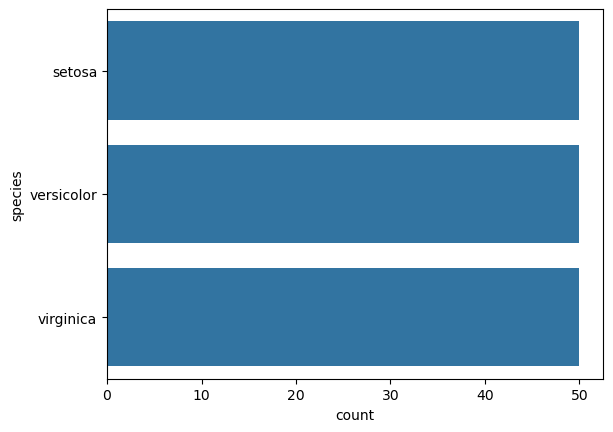

In [25]:
sns.countplot(df['species'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

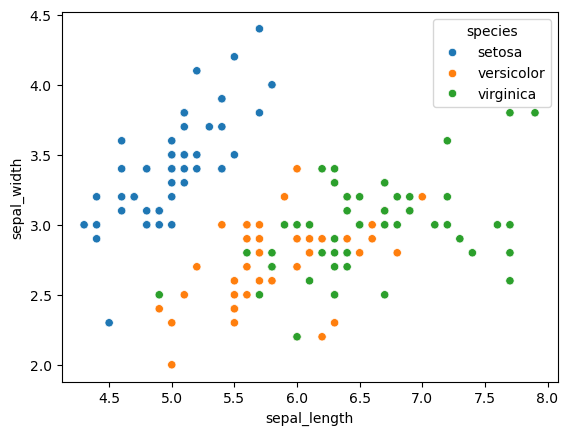

In [26]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species')

<Axes: xlabel='petal_length', ylabel='petal_width'>

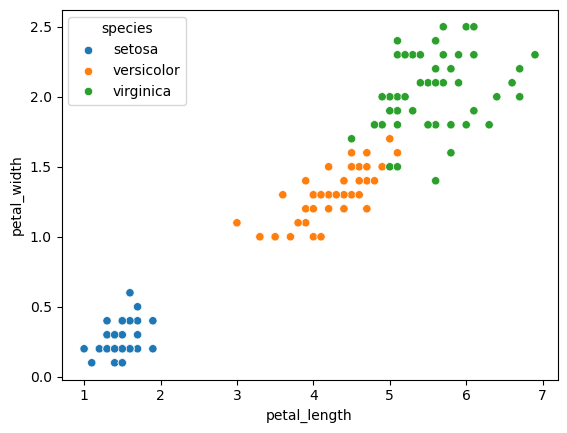

In [27]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species')

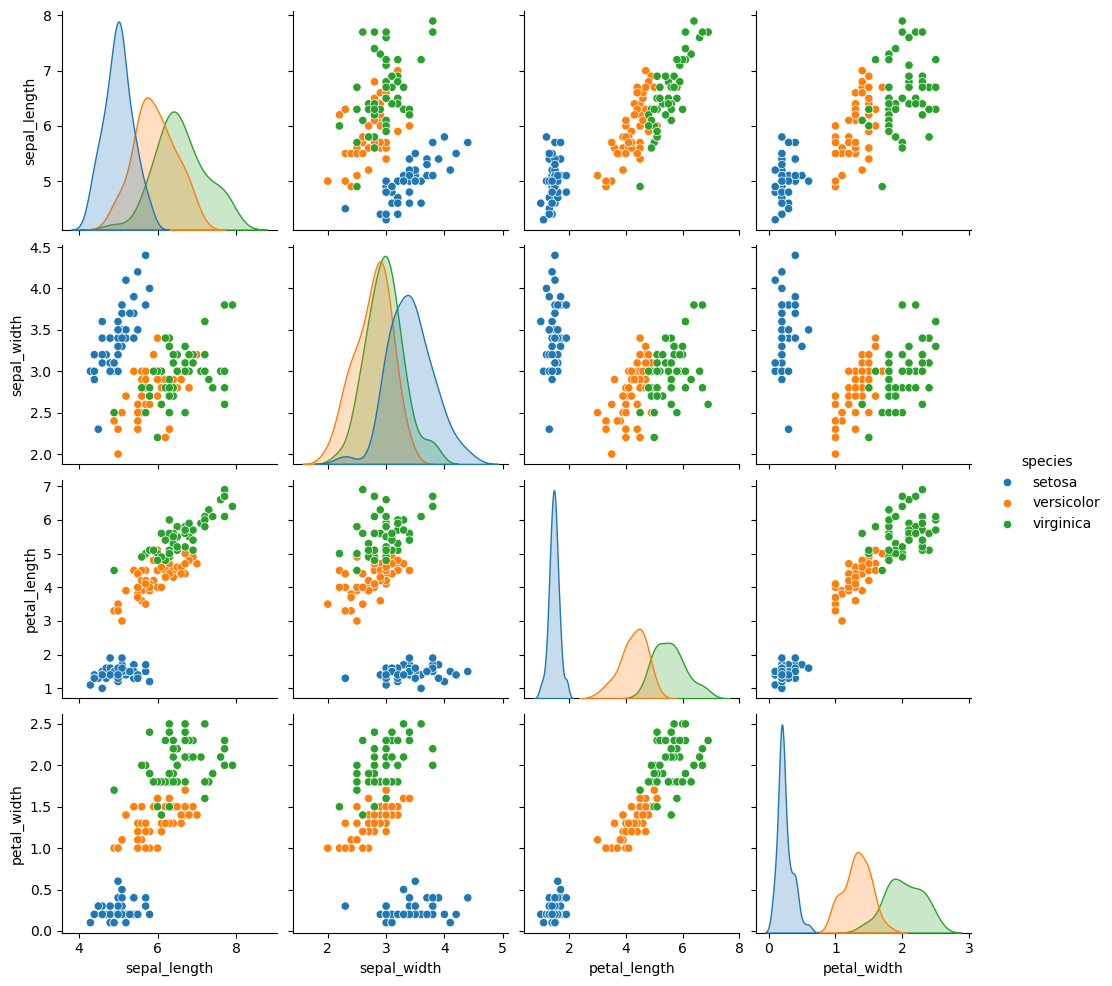

In [28]:
sns.pairplot(df,hue='species')

In [29]:
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: 'setosa'

Вы можете находить новые типы графиков с помощью поиска в google! Например, поиск по ключевым словам "3d matplotlib scatter plot" приведёт Вас к этой странице: https://matplotlib.org/3.1.1/gallery/mplot3d/scatter3d.html

In [ ]:
df['species'].unique()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

### Разбиение на обучающий и тестовый наборы данных, а также масштабирование данных (Scaling)

In [33]:
X = df.drop('species',axis=1)
y = df['species']

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [36]:
scaler = StandardScaler()

In [37]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Модель мультиклассовой логистической регрессии

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [39]:
from sklearn.model_selection import GridSearchCV

In [40]:
# В зависимости от предупреждений (warning), возможно Вам придётся 
# поменять максимальное количество итераций
# Или же поэкспериментировать с другими объектами solver
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)
log_model_CV = LogisticRegressionCV()

### Поиск лучших значений гиперпараметров с помощью GridSearch

Основные параметры - тип penalty и значение регуляризации C.

In [41]:
import numpy as np
# Тип Penalty
penalty = ['l1', 'l2']

# Используем логарифмически отстоящие друг от друга значения C (рекомендовано в официальной документации)
C = np.logspace(0, 4, 10)

In [42]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [43]:
grid_model.fit(scaled_X_train,y_train)

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_clas

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [44]:
grid_model.best_params_

{'C': 7.742636826811269, 'penalty': 'l1'}

<class 'sklearn.linear_model._logistic.LogisticRegression'>.score

### Оценка модели в задачах классификации

In [101]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [102]:
y_pred = grid_model.predict(scaled_X_test)

In [103]:
accuracy_score(y_test,y_pred)

0.9736842105263158

In [104]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

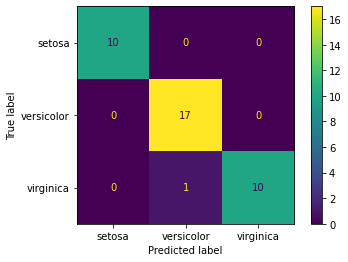

In [108]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)

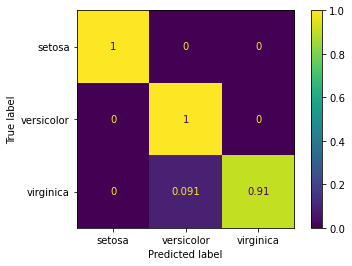

In [109]:
# Масштабированные значения, максимальное значение = 1
plot_confusion_matrix(grid_model,scaled_X_test,y_test,normalize='true')

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## Оцениваем линию кривой (curve) и область под линией (AUC - area under the curve)

**Более подробно см. в видео-лекции! В случае нескольких классов мы должны рисовать графики вручную. К счастью, в документации Scikit-learn уже есть много примеров.**

Источник: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

Мы написали для Вас функцию, которая создаёт и рисует графики [ROC-кривых](https://ru.wikipedia.org/wiki/ROC-%D0%BA%D1%80%D0%B8%D0%B2%D0%B0%D1%8F) для каждого класса.

In [116]:
from sklearn.metrics import roc_curve, auc

In [122]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # создаём пустые структуры
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # один раз вычисляем dummies 
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc для каждого класса
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

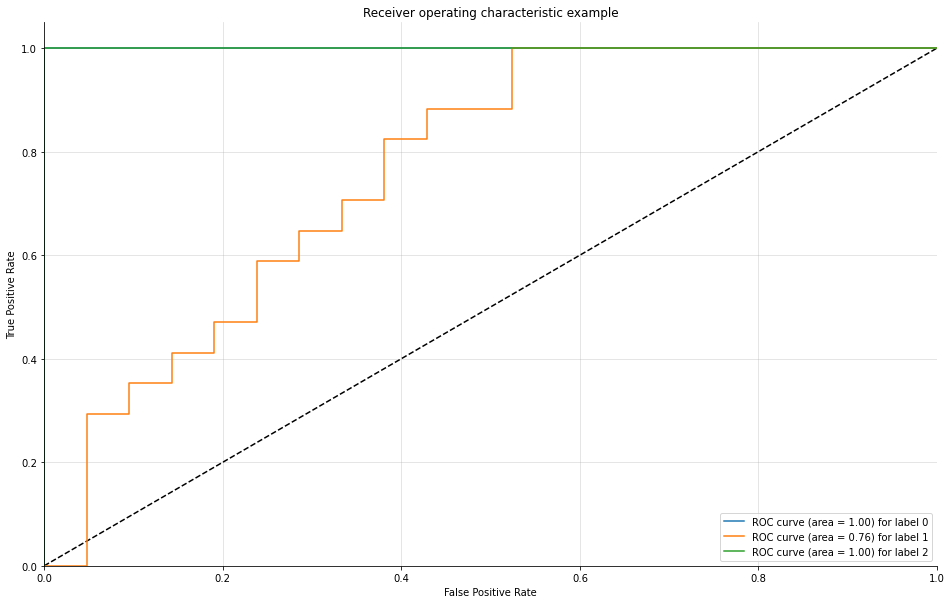

In [123]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes=3, figsize=(16, 10))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../DATA/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species', ylabel='count'>

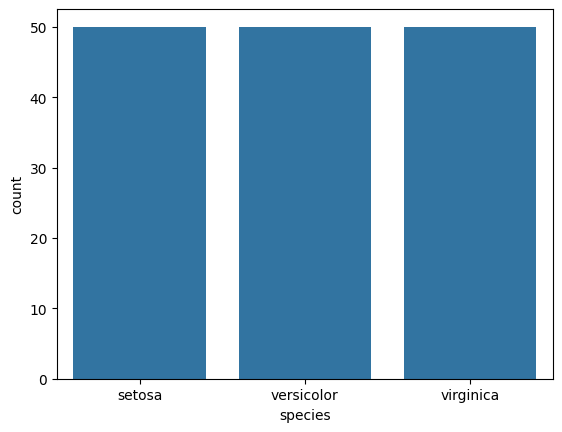

In [8]:
sns.countplot(x='species', data=df)

<Axes: xlabel='petal_length', ylabel='petal_width'>

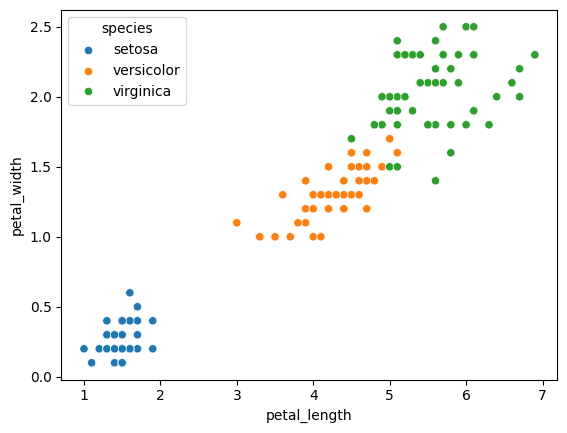

In [9]:
sns.scatterplot(x='petal_length', y='petal_width', data=df, hue='species')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

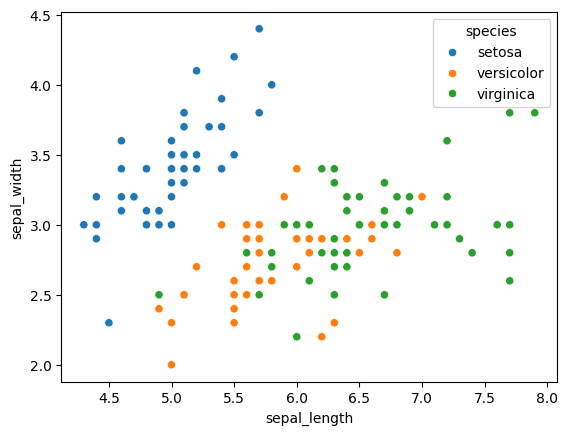

In [10]:
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue='species')

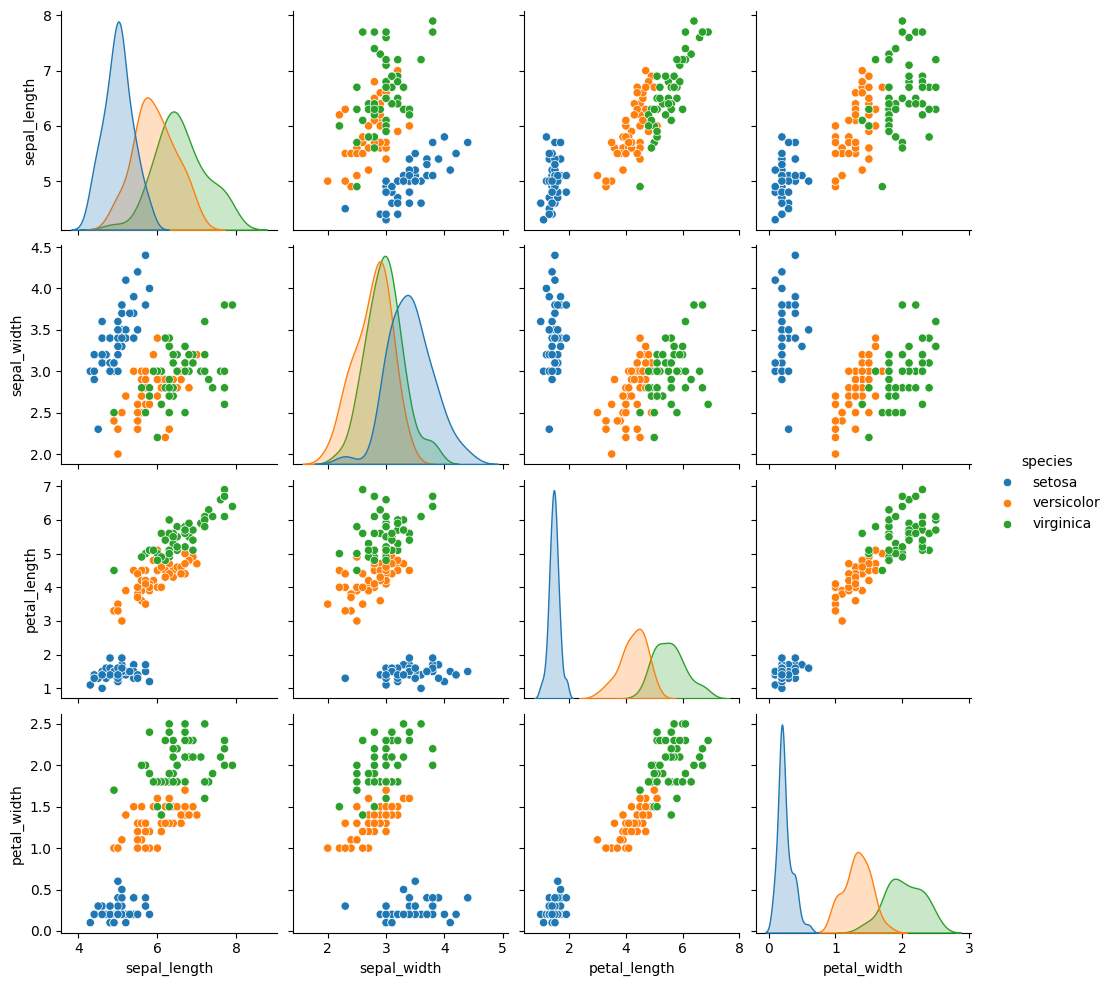

In [11]:
sns.pairplot(data=df, hue='species')

<Axes: >

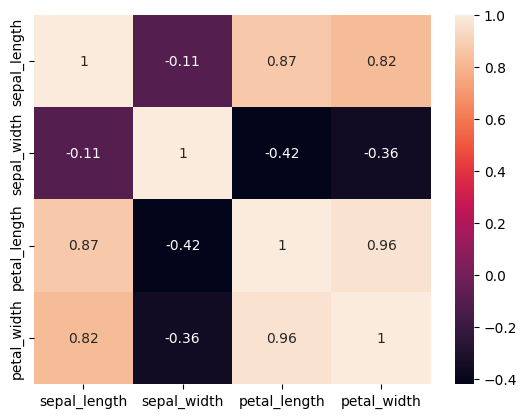

In [12]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [15]:
X = df.drop('species', axis=1)

In [16]:
y = df['species']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [20]:
scaler = StandardScaler()

In [21]:
scaled_X_train = scaler.fit_transform(X_train)

In [23]:
scaled_X_test = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [34]:
log_model = LogisticRegression(solver='saga', multi_class='ovr', max_iter=5000)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
log_modelCV = LogisticRegressionCV()

In [50]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)
param_grid = {'penalty': penalty,
              'l1_ratio': l1_ratio,
              'C': C}

In [52]:
log_model.coef_

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [53]:
grid_model = GridSearchCV(log_model, param_grid=param_grid)

In [44]:
grid_model.fit(scaled_X_train, y_train)

C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\virgi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
C:\Users\virgi\anaconda3\Lib\site-packag

GridSearchCV(estimator=LogisticRegression(l1_ratio=[0.1, 0.2, 0.5, 0.99],
                                          penalty='elasticnet'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
                            ConfusionMatrixDisplay

In [48]:
grid_model.best_params_

{'C': 37.926901907322495, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [49]:
y_pred = grid_model.predict(scaled_X_test)

In [50]:
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [51]:
accuracy_score(y_test, y_pred)

1.0

In [52]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 11]], dtype=int64)

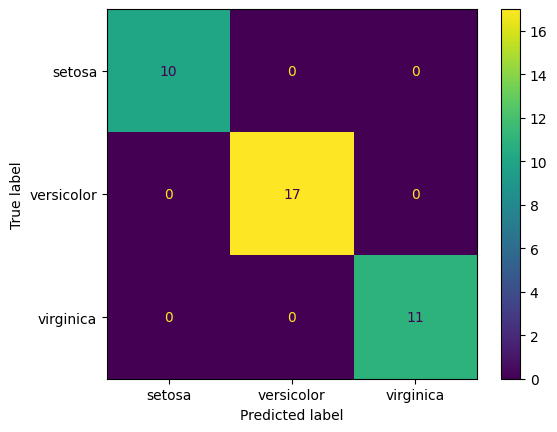

In [53]:
ConfusionMatrixDisplay.from_estimator(grid_model, scaled_X_test, y_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        17
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [56]:
from sklearn.metrics import RocCurveDisplay